## Practical Lab 2: Multivariate Linear Regression, Non-Parametric Models and Cross-Validation

## Part 1

### 1. Get the Data

In [27]:
# Import Required Libraries
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the Diabetes Dataset
diabetes = datasets.load_diabetes(as_frame=True)
X = diabetes.data
y = diabetes.target
df = X.copy()
df['target'] = y

### 2. Frame the Problem

Predict the target: disease progression one year after baseline using the other features.    
This is a regression problem (target is continuous).     
To develop a screening tool for physicians to estimate patient diabetes risk progression based on baseline features like age, BMI, blood pressure, etc.

### 3. Exploratory Data Analysis (EDA)

In [29]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())


Descriptive Statistics:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.7619

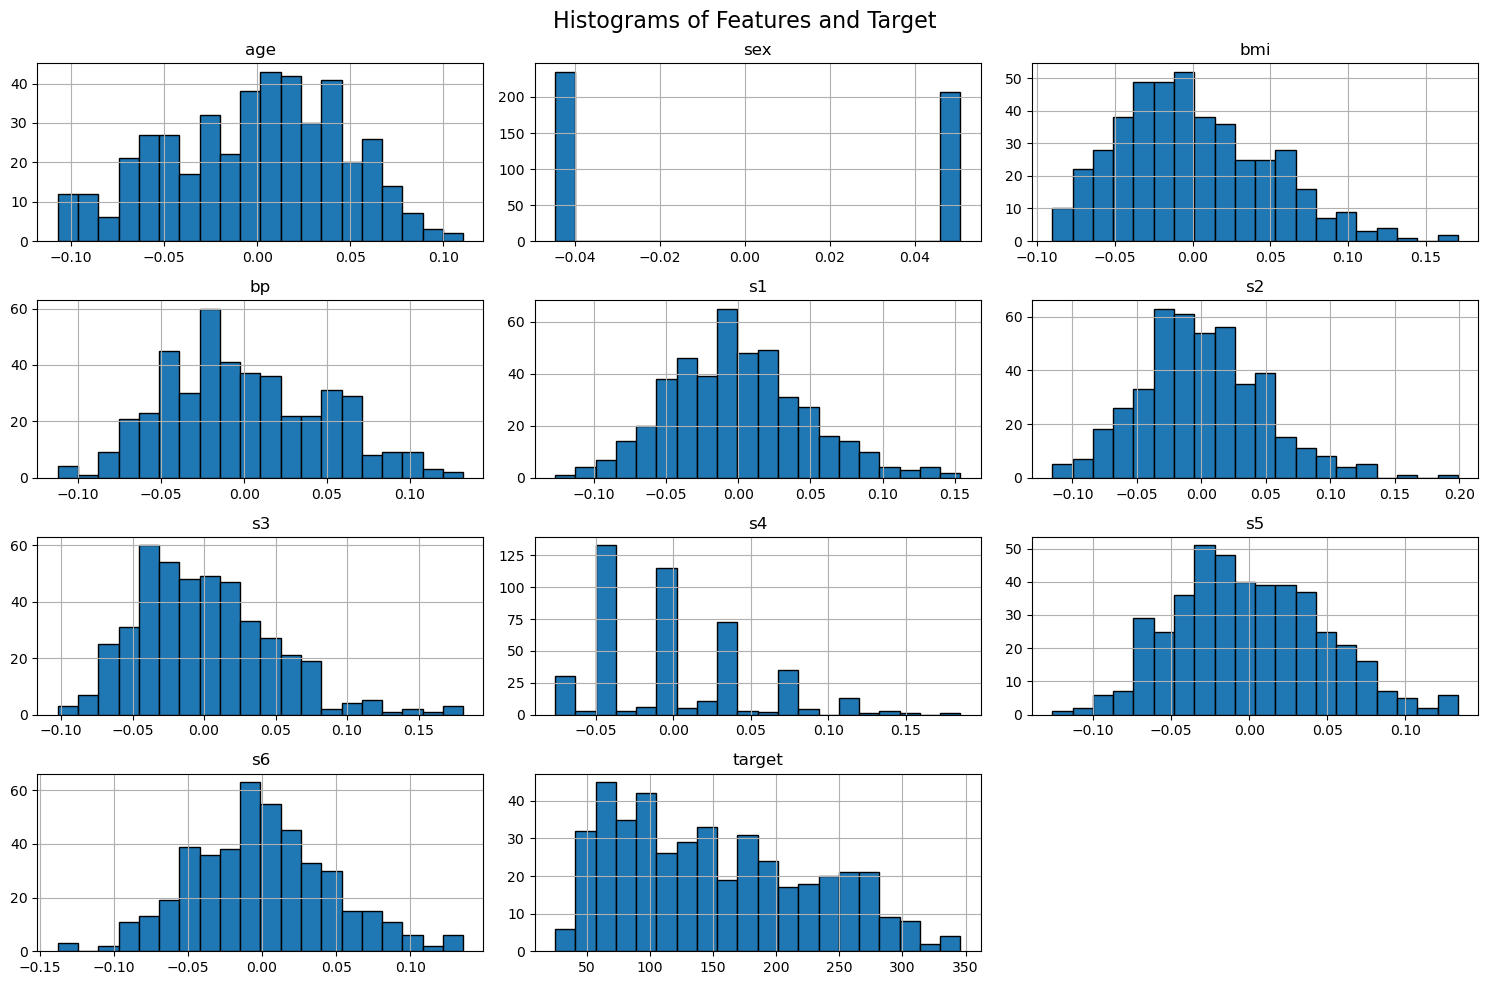

In [31]:
# Histograms of All Features
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms of Features and Target", fontsize=16)
plt.tight_layout()
plt.show()


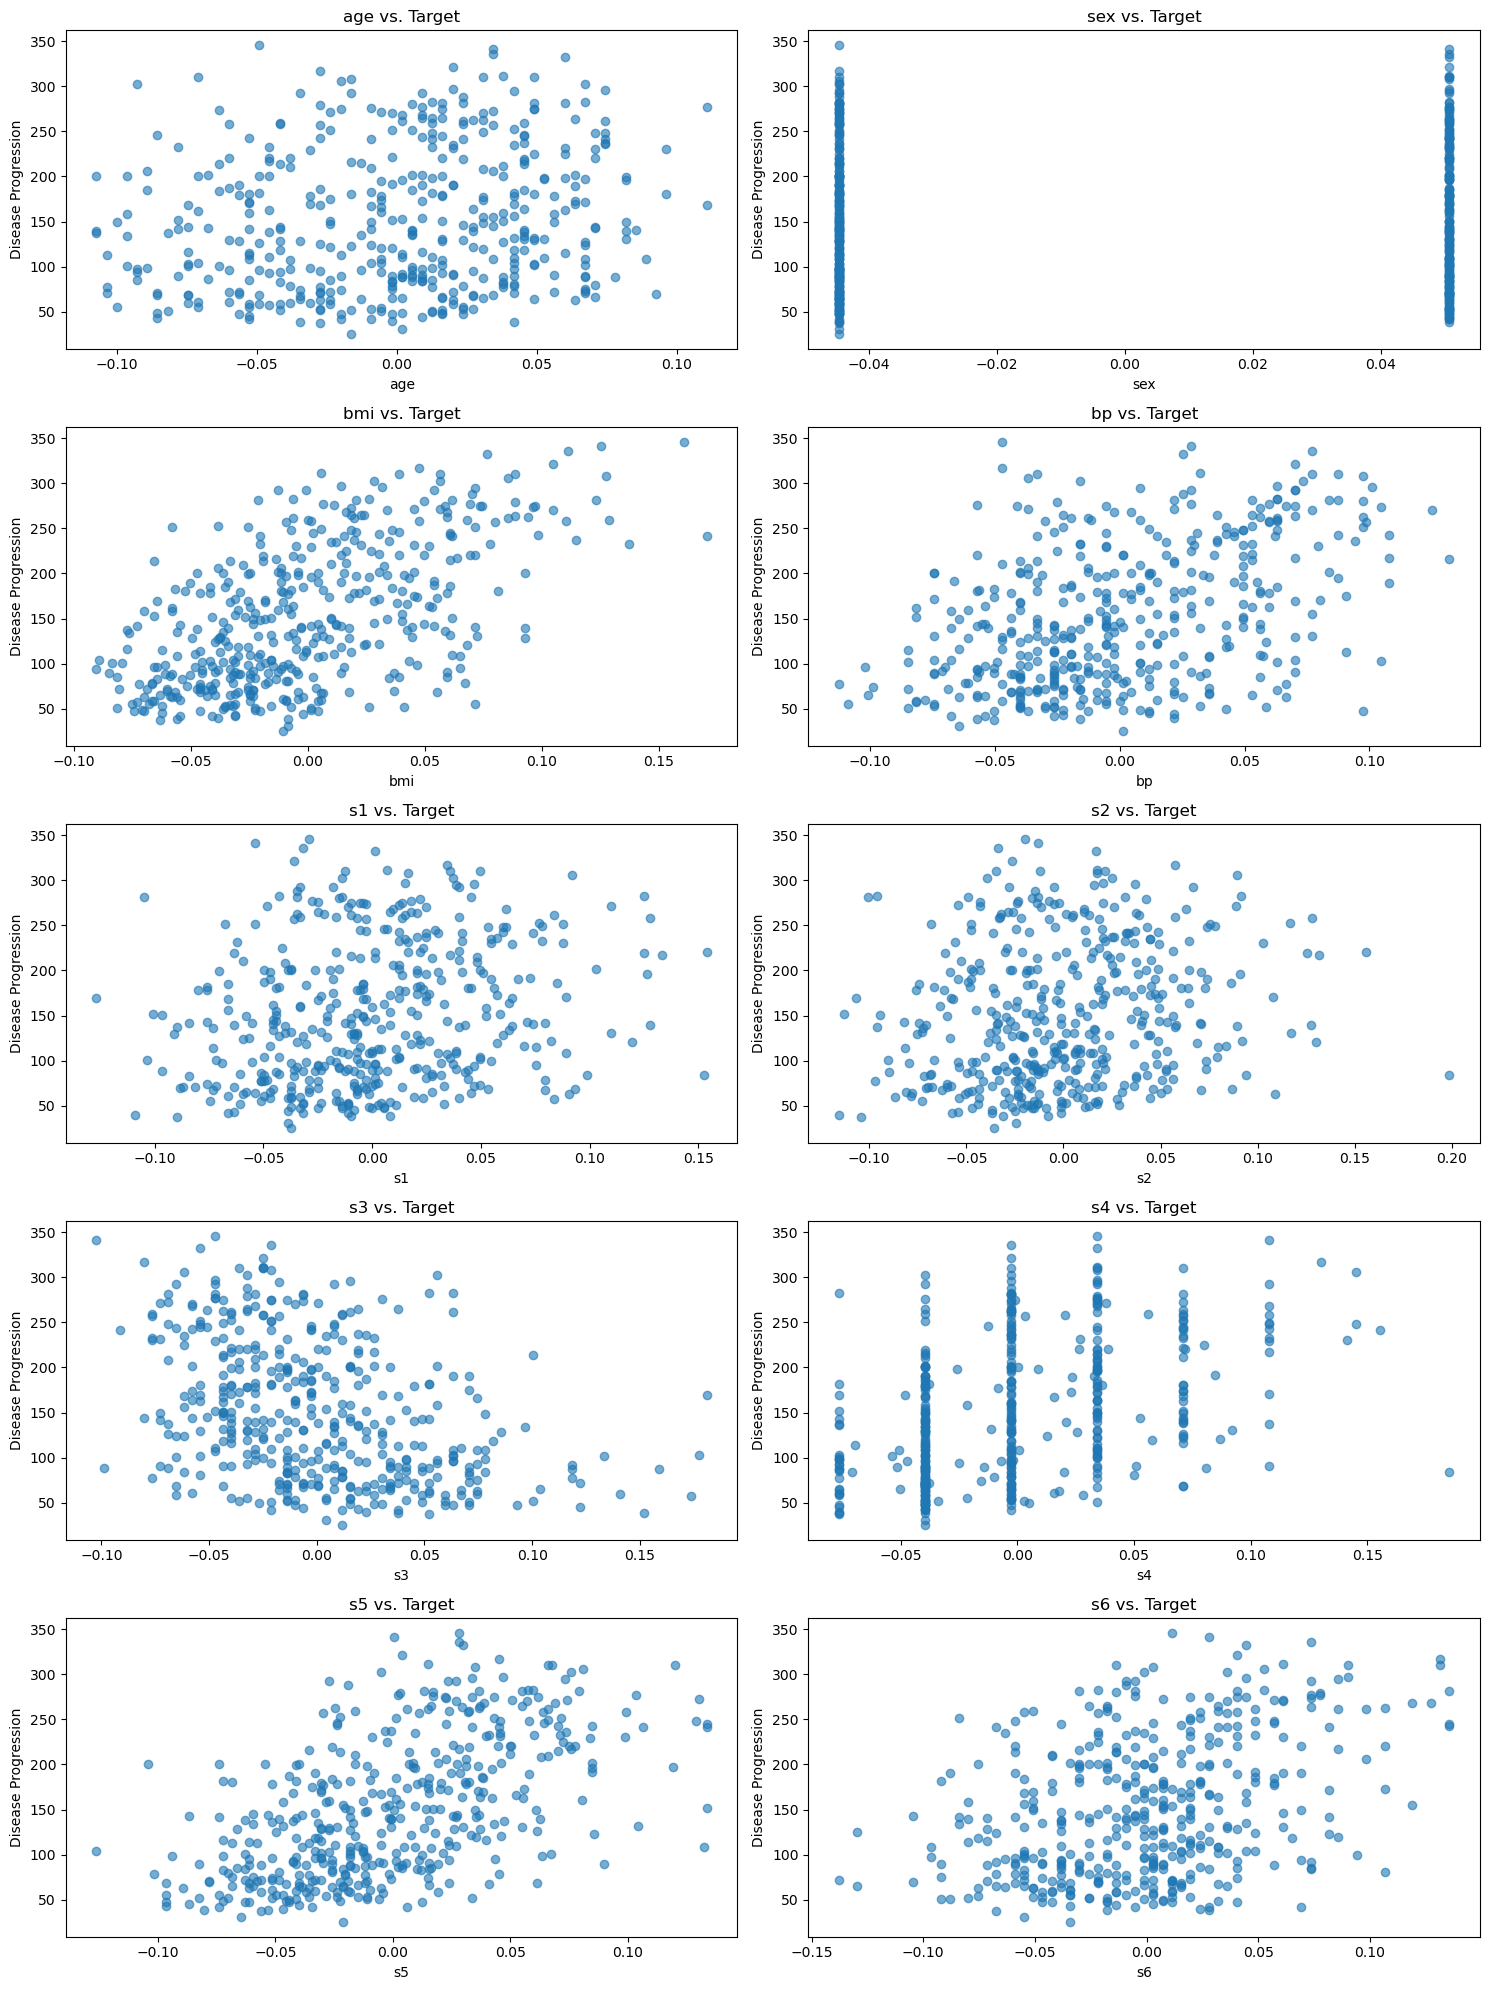

In [33]:
# Scatter Plots (Each Feature vs. Target)
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axs = axs.flatten()
for i, col in enumerate(X.columns):
    axs[i].scatter(df[col], df['target'], alpha=0.6)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Disease Progression")
    axs[i].set_title(f"{col} vs. Target")
plt.tight_layout()
plt.show()


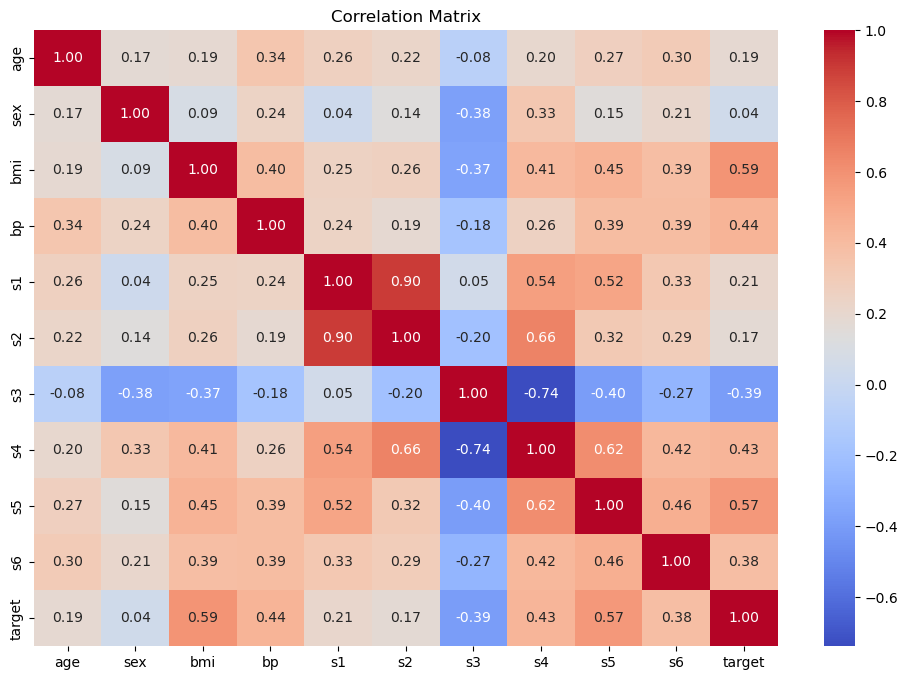

In [35]:
# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### 4. Clean the data

In [37]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [39]:
# Outlier check for target using IQR
Q1 = df['target'].quantile(0.25)
Q3 = df['target'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['target'] < (Q1 - 1.5 * IQR)) | (df['target'] > (Q3 + 1.5 * IQR))]
print(f"\nNumber of outliers in target: {len(outliers)}")


Number of outliers in target: 0


### 5. Split the dataset

In [41]:
# First split: 85% train+val, 15% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

# Second split: 75% train, 10% val from train_val
val_ratio = 0.10 / 0.85
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=val_ratio, random_state=42
)

# Print shapes of datasets
print("\nDataset Split Sizes:")
print(f"Training Set: {X_train.shape}")
print(f"Validation Set: {X_val.shape}")
print(f"Test Set: {X_test.shape}")


Dataset Split Sizes:
Training Set: (330, 10)
Validation Set: (45, 10)
Test Set: (67, 10)


## Part 2

### 6. Models

In [43]:
# Univariate Polynomial Regression on BMI

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Use previously split datasets (from step 5)
# X_train, X_val, X_test, y_train, y_val, y_test assumed available
# If not, re-import and split the data accordingly

# Focus on 'bmi' feature
X_train_bmi = X_train[['bmi']]
X_val_bmi = X_val[['bmi']]
X_test_bmi = X_test[['bmi']]

# Store model performance results
results = []

for degree in range(6):
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_train_poly = poly.fit_transform(X_train_bmi)
    X_val_poly = poly.transform(X_val_bmi)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)

    # Evaluation Metrics
    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100

    results.append({
        "Degree": degree,
        "Train R2": r2_train,
        "Val R2": r2_val,
        "Train MAE": mae_train,
        "Val MAE": mae_val,
        "Train MAPE (%)": mape_train,
        "Val MAPE (%)": mape_val,
        "Model": model,
        "Transformer": poly
    })


### 7. Comparing the models

In [45]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).drop(columns=["Model", "Transformer"])
print("Model Comparison Table:")
display(results_df)

Model Comparison Table:


,Degree,Train R2,Val R2,Train MAE,Val MAE,Train MAPE (%),Val MAPE (%)
0,0,0.000000,-0.000011,66.548209,63.447475,63.352070,58.793283
1,1,0.354240,0.449292,52.278064,41.997581,48.462384,40.444999
2,2,0.354771,0.449158,52.267273,41.757683,48.447858,40.309938
3,3,0.355002,0.447291,52.223375,41.741042,48.356420,40.258961
4,4,0.357983,0.449064,51.944372,41.952846,47.963501,40.240642
5,5,0.358910,0.453513,51.813830,42.083400,47.831494,40.340475


### 8. Identifing the best model

In [49]:
# Select best model (Degree 1 based on validation performance)
best_result = next(item for item in results if item["Degree"] == 1)
best_model = best_result["Model"]
best_poly = best_result["Transformer"]

### 9. Running the chosen model

In [51]:
X_test_poly = best_poly.transform(X_test_bmi)
y_test_pred = best_model.predict(X_test_poly)

test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print(f"\nTest R2: {test_r2:.3f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")


Test R2: 0.204
Test MAE: 54.93
Test MAPE: 48.75%


### 10. Plotting a graph for the train, validation and test data

C:\Users\srinu\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


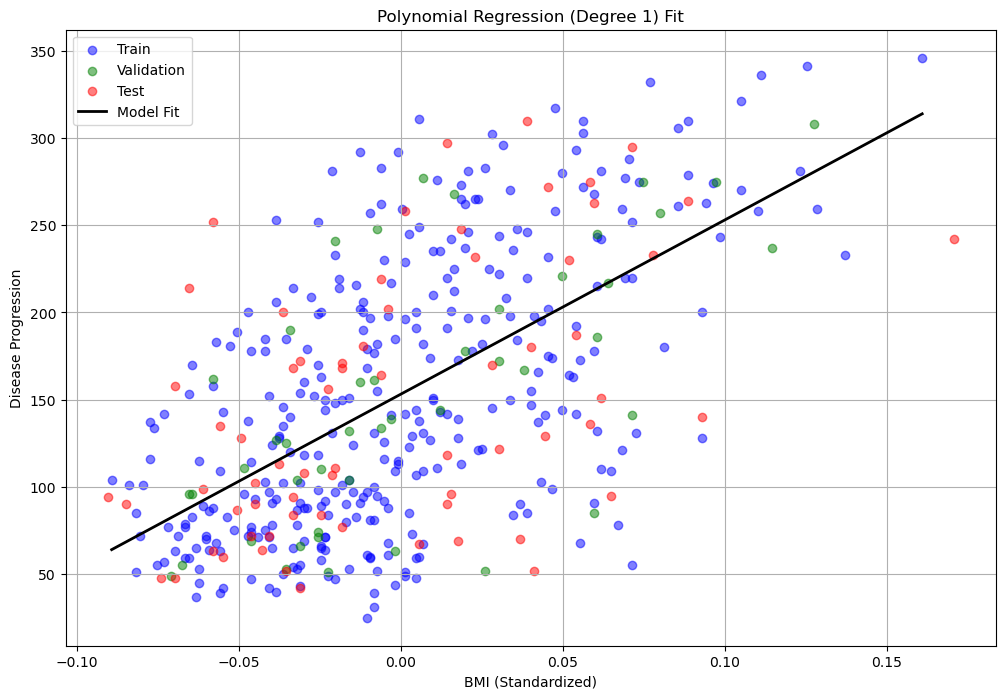

In [53]:
# Plot the model fit
bmi_range = np.linspace(X_train_bmi.min(), X_train_bmi.max(), 300).reshape(-1, 1)
bmi_range_poly = best_poly.transform(bmi_range)
y_range_pred = best_model.predict(bmi_range_poly)

plt.figure(figsize=(12, 8))
plt.scatter(X_train_bmi, y_train, label='Train', color='blue', alpha=0.5)
plt.scatter(X_val_bmi, y_val, label='Validation', color='green', alpha=0.5)
plt.scatter(X_test_bmi, y_test, label='Test', color='red', alpha=0.5)
plt.plot(bmi_range, y_range_pred, color='black', label='Model Fit', linewidth=2)
plt.xlabel("BMI (Standardized)")
plt.ylabel("Disease Progression")
plt.title("Polynomial Regression (Degree 1) Fit")
plt.legend()
plt.grid(True)
plt.show()

### 11. Writing the equation of the best model

In [55]:
# Model Equation
intercept = best_model.intercept_
coef = best_model.coef_
feature_names = best_poly.get_feature_names_out(input_features=['bmi'])
equation = f"y = {intercept:.2f} + " + " + ".join([f"{coef[i]:.2f}*{feature_names[i]}" for i in range(1, len(coef))])
print("\nModel Equation:")
print(equation)


Model Equation:
y = 153.14 + 999.06*bmi


### 12. Calculating the expected diabetes progression

In [57]:
# Predict for a BMI value
sample_bmi = np.array([[0.05]])  # standardized BMI
sample_bmi_poly = best_poly.transform(sample_bmi)
predicted_value = best_model.predict(sample_bmi_poly)[0]
print(f"\nPredicted Disease Progression for BMI = 0.05: {predicted_value:.2f}")


Predicted Disease Progression for BMI = 0.05: 203.09


C:\Users\srinu\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [59]:
# Trainable Parameters for Each Degree
param_counts = []
for degree in range(6):
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    poly.fit(X_train_bmi)
    num_params = len(poly.get_feature_names_out(['bmi']))
    param_counts.append({"Degree": degree, "Trainable Parameters": num_params})

param_df = pd.DataFrame(param_counts)
print("\nTrainable Parameters Table:")
display(param_df)


Trainable Parameters Table:


,Degree,Trainable Parameters
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5
5,5,6


### 14. Conclusions

In this study, univariate polynomial regression models (degrees 0 to 5) were developed to predict diabetes disease progression using only the BMI feature. The linear model (degree 1) emerged as the best performer, achieving the highest validation R² (~0.45) and relatively low MAE and MAPE, indicating that BMI explains a moderate portion of the variance in disease progression. While higher-degree models captured training patterns better, they suffered from overfitting and failed to generalize. On the test set, the degree-1 model achieved R² ≈ 0.20 and MAPE ≈ 48.75%, suggesting moderate predictive reliability. The model equation, 𝑦=153.14+999.06×BMI, estimates a sharp progression increase with BMI. A prediction for BMI = 0.05 yielded a progression score of 203.09. Trainable parameters increased with polynomial degree (from 1 for degree 0 to 6 for degree 5). Despite its simplicity, the model's univariate nature is a limitation—it omits critical predictors like age, blood pressure, and glucose levels. Furthermore, the high MAPE values highlight that predictions may significantly deviate for individual cases. Overall, while the linear model offers a meaningful baseline, expanding to multivariate modeling is necessary for more accurate and clinically useful predictions.

## Part 3

### Polynomial Regression Models (Degrees > 1)

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
import pandas as pd

poly_results = []

for degree in [2, 3]:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    y_test_pred = model.predict(X_test_poly)

    poly_results.append({
        "Model": f"Polynomial Degree {degree}",
        "Train R2": r2_score(y_train, y_train_pred),
        "Val R2": r2_score(y_val, y_val_pred),
        "Test R2": r2_score(y_test, y_test_pred),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Val MAE": mean_absolute_error(y_val, y_val_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Train MAPE": np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100,
        "Val MAPE": np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100,
        "Test MAPE": np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100,
        "Num Parameters": len(poly.get_feature_names_out(input_features=X_train.columns))
    })

poly_results_df = pd.DataFrame(poly_results)
display(poly_results_df)


,Model,Train R2,Val R2,Test R2,Train MAE,Val MAE,Test MAE,Train MAPE,Val MAPE,Test MAPE,Num Parameters
0,Polynomial Degree 2,0.598109,0.602991,0.337028,39.697470,37.745257,45.867035,34.938567,41.097638,39.473622,65
1,Polynomial Degree 3,0.909409,-115.857067,-101.080477,16.337268,287.001578,282.682535,15.118197,193.127885,241.222900,285


### Decision Tree Models

In [65]:
from sklearn.tree import DecisionTreeRegressor

tree_results = []

for depth in [3, 5]:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)

    y_train_pred = tree.predict(X_train)
    y_val_pred = tree.predict(X_val)
    y_test_pred = tree.predict(X_test)

    tree_results.append({
        "Model": f"Decision Tree (Depth={depth})",
        "Train R2": r2_score(y_train, y_train_pred),
        "Val R2": r2_score(y_val, y_val_pred),
        "Test R2": r2_score(y_test, y_test_pred),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Val MAE": mean_absolute_error(y_val, y_val_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Train MAPE": np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100,
        "Val MAPE": np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100,
        "Test MAPE": np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100,
        "Num Parameters": tree.get_n_leaves()
    })

tree_results_df = pd.DataFrame(tree_results)
display(tree_results_df)


,Model,Train R2,Val R2,Test R2,Train MAE,Val MAE,Test MAE,Train MAPE,Val MAPE,Test MAPE,Num Parameters
0,Decision Tree (Depth=3),0.532987,0.412751,0.307655,43.588017,42.077532,50.371250,37.747793,43.651447,44.903150,8
1,Decision Tree (Depth=5),0.710430,0.162955,0.326640,32.816831,51.550795,47.975674,28.604584,51.768802,39.910792,32


### k-Nearest Neighbors Models

In [67]:
from sklearn.neighbors import KNeighborsRegressor

knn_results = []

for k in [3, 5]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_val_pred = knn.predict(X_val)
    y_test_pred = knn.predict(X_test)

    knn_results.append({
        "Model": f"kNN (k={k})",
        "Train R2": r2_score(y_train, y_train_pred),
        "Val R2": r2_score(y_val, y_val_pred),
        "Test R2": r2_score(y_test, y_test_pred),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Val MAE": mean_absolute_error(y_val, y_val_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Train MAPE": np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100,
        "Val MAPE": np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100,
        "Test MAPE": np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100,
        "Num Parameters": k  # Number of neighbors
    })

knn_results_df = pd.DataFrame(knn_results)
display(knn_results_df)


,Model,Train R2,Val R2,Test R2,Train MAE,Val MAE,Test MAE,Train MAPE,Val MAPE,Test MAPE,Num Parameters
0,kNN (k=3),0.639838,0.347063,0.290369,35.667677,50.770370,49.885572,29.968447,49.452291,41.614407,3
1,kNN (k=5),0.576691,0.485098,0.423509,39.904848,43.395556,43.886567,34.420100,42.889788,37.740325,5
